In [12]:
from virgo.data.cluster import VirgoCluster
from virgo.data.cleaner import AutoDensityCleaner
from virgo.models.kernel import VirgoKernel
from virgo.models.mixture import VirgoMixture, VirgoClustering

%load_ext autoreload
%autoreload 2

%matplotlib notebook
# %matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Reading  1284602  particles
Data set 0 - Shape: (78048, 9)
Mean / Std: 72162.354 / 237506.020
Min / Max: -19939.822 / 1284546.000
Data set 1 - Shape: (78048, 8)
Mean / Std: 0.000 / 1.000
Min / Max: -4.928 / 10.257


<IPython.core.display.Javascript object>


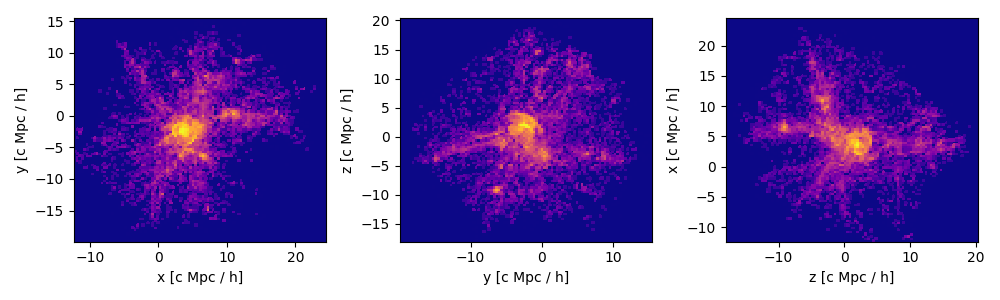

In [14]:
snap_id = 800
filebase = f"/home/max/Software/virgo/data/250x_hd/snap_{snap_id}"

# snap_id = 38 # 36
# filebase = f"/home/max/Software/virgo/data/250x_mhd/250x_mhd_snap_0{snap_id}"

virgo_cluster = VirgoCluster(
    file_name=filebase, io_mode=1, cut_mach_dim=-2, n_max_data=100000, # 800000
)
# virgo_cluster.data = virgo_cluster.data[:, :-1]

virgo_cluster.scale_data()
virgo_cluster.print_datastats()
virgo_cluster.plot_raw_hists(
    bins=100, # plot_range=[[2000., 8000.], [-6000., 1000.], [-3000., 6000.]]
)

In [ ]:
virgo_cluster.run_fof(
#     linking_length=ll[f"{snap_id}"],
    linking_length=45., # 45
#     linking_length=ll_est,
    min_group_size=10000,
    use_scaled_data=False,
)

labels, counts = virgo_cluster.get_labels(return_counts=True)
print(labels, counts)
virgo_cluster.plot_cluster(n_step=2, maker_size=1.0)

In [ ]:
# virgo_cluster.export_cluster(f"vc_appendix_fof_{snap_id}", remove_uncertain=False, remove_evno=True)

(array([-1,  0,  1,  2,  3]), array([49709, 14183,  7803,  3348,  3005]))


<IPython.core.display.Javascript object>


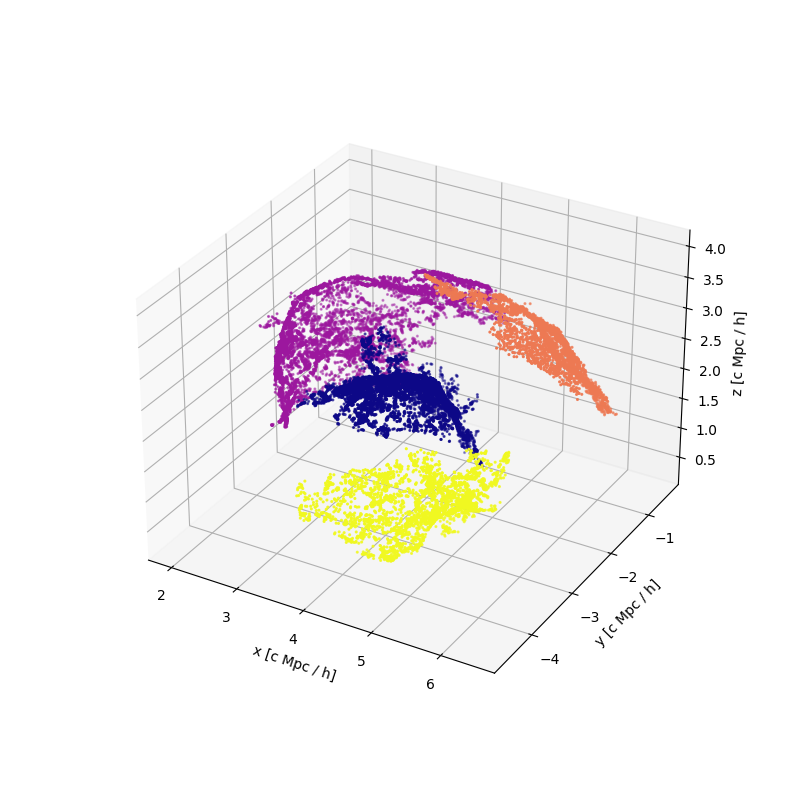

In [17]:
virgo_clustering = VirgoClustering(
    virgo_cluster,
    min_samples=10,
    clustering_type="dbscan",
    fit_dim_ind=[0, 1, 2],
    eps=0.025,
)
virgo_clustering.predict()
virgo_cluster.remove_small_groups(remove_thresh=2000)
virgo_cluster.sort_labels()
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

virgo_cluster.plot_cluster(n_step=1)

In [ ]:
virgo_cluster.export_cluster(f"vc_appendix_dbscanspatnorm_{snap_id}", remove_uncertain=False, remove_evno=True)

In [3]:
virgo_kernel = VirgoKernel(virgo_cluster, k_nystroem=100, pca_comp=5)
virgo_kernel()
virgo_cluster.print_datastats()

Data set 0 - Shape: (624274, 9)
Mean / Std: 72199.351 / 237720.782
Min / Max: -19939.828 / 1284588.000
Data set 1 - Shape: (624274, 5)
Mean / Std: -0.000 / 0.240
Min / Max: -0.519 / 0.862


ELBO: 3.408685598083792
Mixture weights [0.52688448 0.47311552]
(array([0, 1]), array([329114, 295160]))


<IPython.core.display.Javascript object>


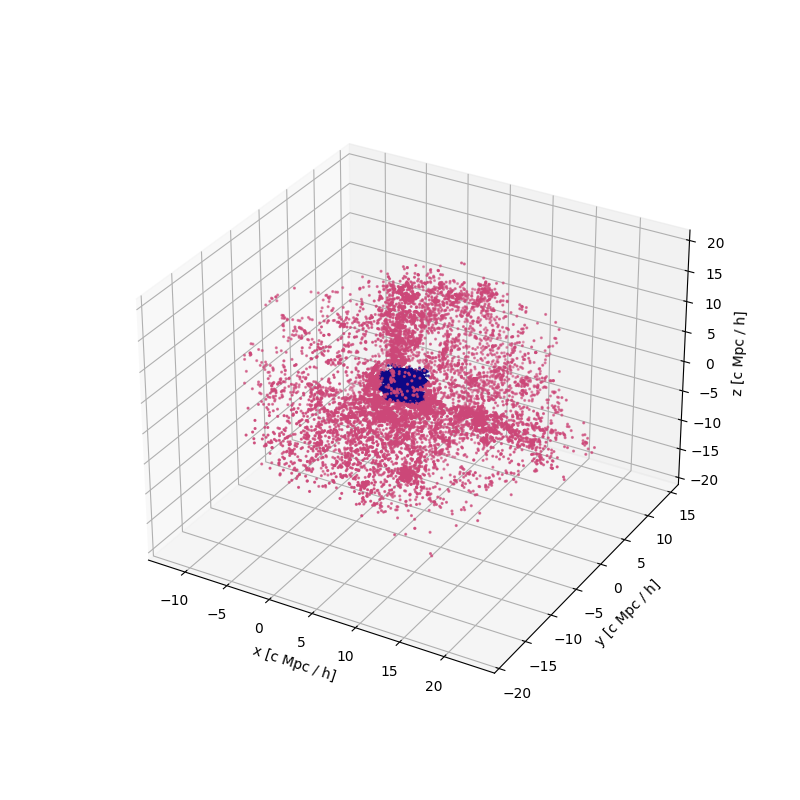

In [4]:
virgo_mixture = VirgoMixture(virgo_cluster, n_comp=2)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=False)
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

# virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1] = 2
# virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1][0:100] = 4

# virgo_cluster.plot_cluster(cmap_vmax=2, n_step=25, plot_kernel_space=True, store_gif=False, gif_title="nystroem_separation_kernelspace")
virgo_cluster.plot_cluster(cmap_vmax=2, n_step=25, store_gif=False, gif_title="nystroem_separation_kernelspace")

In [ ]:
# virgo_cluster.export_cluster(f"vc_denoised_unclean_{snap_id}", remove_uncertain=False, remove_evno=True)

In [ ]:
# import numpy as np
# file_name = f"vc_denoised_unclean_kernelspace_{snap_id}"
# np.savetxt(f"{file_name}_cluster.txt", virgo_cluster.scaled_data)
# np.savetxt(f"{file_name}_cluster_labels.txt", virgo_cluster.cluster_labels)

Density cutoff 9.522914479233067e-11
Densities: [9.53244693e-11 5.31113912e-14]
(array([-1,  0]), array([295160, 329114]))


/home/max/Software/virgo/virgo/data/cleaner.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.clusters = np.array(self.clusters)
/home/max/Software/virgo/virgo/data/cleaner.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.labels = np.array(self.labels)


<IPython.core.display.Javascript object>


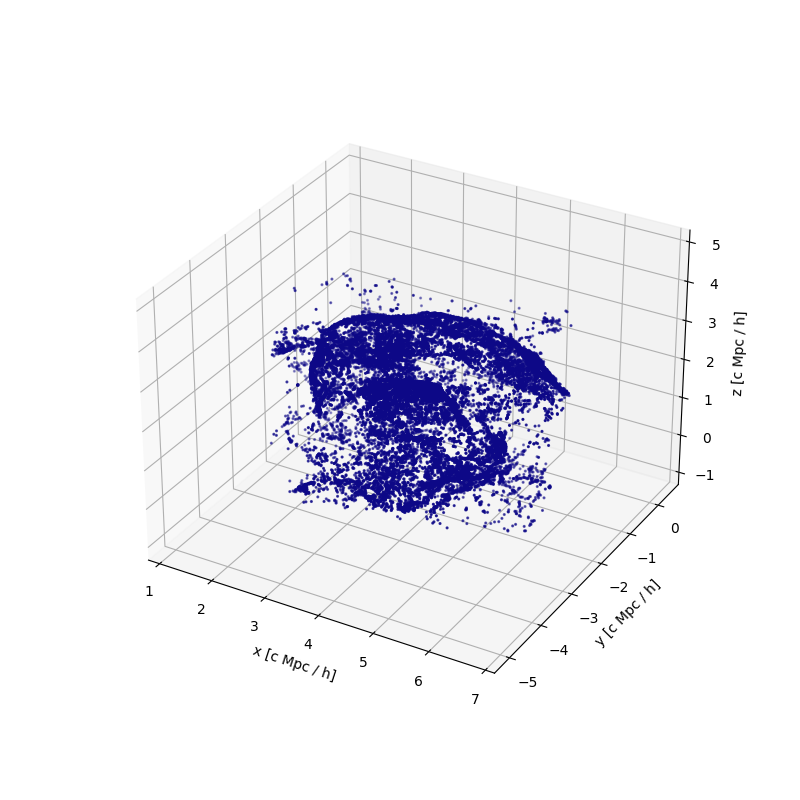

In [5]:
d_cleaner = AutoDensityCleaner(virgo_cluster)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
virgo_cluster.plot_cluster(n_step=10)

In [ ]:
# virgo_cluster.export_cluster(f"vc_denoised_clean_{snap_id}", remove_uncertain=False, remove_evno=True)

In [ ]:
# FoF approach

In [6]:
vc_2 = VirgoCluster(file_name=None)
vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0][::10] # [::4] 
vc_2.scale_data()
vc_2.print_datastats()

Data set 0 - Shape: (32912, 9)
Mean / Std: 72595.323 / 238305.982
Min / Max: -5068.784 / 1284267.000
Data set 1 - Shape: (32912, 8)
Mean / Std: -0.000 / 1.000
Min / Max: -3.203 / 13.179


In [ ]:
vc_2.run_fof(
#     linking_length=ll[f"{snap_id}"],
    linking_length=90.,
#     linking_length=ll_est,
    min_group_size=600,
    use_scaled_data=False,
)

labels, counts = vc_2.get_labels(return_counts=True)
print(labels, counts)
vc_2.plot_cluster(n_step=2, maker_size=3.0)

In [ ]:
vc_2.export_cluster(f"vc_appendix_fofpostdenoise_{snap_id}", remove_uncertain=False, remove_evno=True)

(array([-1,  0,  1,  2,  3,  4]), array([ 7534, 12089,  6767,  3429,  2066,  1027]))


<IPython.core.display.Javascript object>


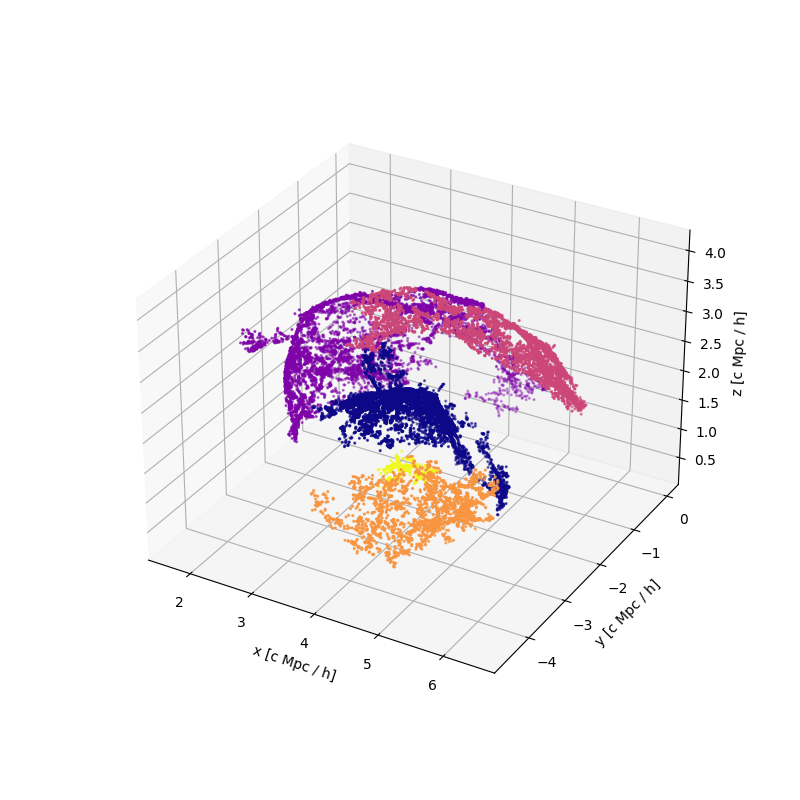

In [10]:
virgo_clustering = VirgoClustering(
    vc_2,
    min_samples=10,
    clustering_type="dbscan",
    fit_dim_ind=[0, 1, 2],
    eps=0.11,
)
virgo_clustering.predict()
vc_2.remove_small_groups(remove_thresh=600)
vc_2.sort_labels()
labels_removed = vc_2.get_labels(return_counts=True)
print(labels_removed)

vc_2.plot_cluster(n_step=1)

In [11]:
vc_2.export_cluster(f"vc_appendix_dbscanpostdenoise_{snap_id}", remove_uncertain=False, remove_evno=True)

In [ ]:
vc_2 = VirgoCluster(file_name=None)
vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0][::10] # [::10] # [::4] 
vc_2.scale_data()
vc_2.print_datastats()

In [ ]:
virgo_kernel = VirgoKernel(
    vc_2, k_nystroem=500, pca_comp=6, spatial_dim=[0, 1, 2, 3, 4, 5]
)

virgo_kernel(virgo_kernel.custom_kernel)
vc_2.print_datastats()

In [ ]:
# full data 
# ll = {
#     "750": 0.101,
#     "760": 0.14,
#     "770": 0.24,
#     "780": 0.190,
#     "790": 0.125,
#     "800": 0.115,
#     "810": 0.130,
#     "820": 0.13,
# }
#  n_max_data=800000 
ll = {
    "750": 0.11,
    "760": 0.14,
    "770": 0.2,
    "780": 0.190,
    "790": 0.15,
    "800": 0.135,
    "810": 0.11,
    "820": 0.13,
}

# print(snap_id, " Manual ll: ", ll[f"{snap_id}"])

vc_2.run_fof(
#     linking_length=ll[f"{snap_id}"],
#     linking_length=0.21,
#     linking_length=ll_est,
    min_group_size=600,
    use_scaled_data=True,
)

labels, counts = vc_2.get_labels(return_counts=True)
print(labels, counts)
vc_2.plot_cluster(n_step=1, plot_kernel_space=True)
vc_2.plot_cluster(n_step=1, maker_size=3.0)
# vc_2.plot_cluster(n_step=1, remove_uncertain=False)

In [ ]:
vc_2.plot_cluster(n_step=1, plot_kernel_space=True, store_gif=False, gif_title=f"snap{snap_id}_fit_kspace")
vc_2.plot_cluster(n_step=1, maker_size=3.0, store_gif=False, gif_title=f"snap{snap_id}_fit_sub")

In [ ]:
labels, counts = vc_2.get_labels(return_counts=True)
vc_2.cluster_labels[vc_2.cluster_labels < 0] = labels.shape[0] - 1 
vc_2.plot_cluster(n_step=1, store_gif=False, gif_title=f"snap{snap_id}_fit_sub_wnoise")

In [ ]:
# labels, counts = vc_2.get_labels(return_counts=True)
# print(labels, counts)

In [ ]:
vc_2.export_cluster(f"vc_fitted_{snap_id}", remove_uncertain=False, remove_evno=True)

In [ ]:
# snap_id = 810
# filebase = f"virgo/data/250x_hd/snap_{snap_id}"

# vcluster = VirgoCluster(
#     file_name=filebase,
#     io_mode=1,
#     cut_mach_dim=-2,
#     n_max_data=800000, 
# )
# vcluster.scale_data()


# vkernel = VirgoKernel(
#     vcluster,
#     k_nystroem=100,
#     pca_comp=5,
# )
# vkernel()


# vmixture = VirgoMixture(vcluster, n_comp=2)
# vmixture.fit()
# vmixture.predict(remove_uncertain_labels=False)


# d_cleaner = AutoDensityCleaner(vcluster)
# d_cleaner.clean()


# vcluster.plot_cluster(n_step=10)
# vcluster_clean = VirgoCluster(file_name=None)
# vcluster_clean.data = vcluster.cluster[vcluster.cluster_labels >=0]

In [ ]:
# vcluster_clean = VirgoCluster(file_name=None)
# vcluster_clean.data = vcluster.cluster[vcluster.cluster_labels >=0][::10]
# vcluster_clean.scale_data()


# vkernel = VirgoKernel(
#     vcluster_clean,
#     k_nystroem=500,
#     pca_comp=6,
#     spatial_dim=[0, 1, 2, 3, 4, 5],
# )
# vkernel(vkernel.custom_kernel)


# vcluster_clean.run_fof(
#     min_group_size=700,
#     use_scaled_data=True,
# )
# vcluster_clean.plot_cluster(n_step=1)


# labels, counts = vcluster_clean.get_labels(return_counts=True)
# vcluster_clean.cluster_labels[vcluster_clean.cluster_labels < 0] = labels.shape[0] -1 
# vcluster_clean.export_cluster(
#     f"vc_fitted_{snap_id}",
#     remove_uncertain=False,
#     remove_evno=True,
# )